<a href="https://colab.research.google.com/github/Yamneaties/erp-grapher/blob/main/ERP_Grapher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File Uploads

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials





In [2]:
import pandas as pd
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Dictionary to store the file IDs and names
file_ids = {
    # id : name
    "137nf0kS24HK32A3vpFiBzIgU6pQvH3as": "Andrew_1",
    "1P09caTKsjbnedqW-DoLZMUYqXWvBmnAc": "Ryan_1",
    "1TmoxH1c527FXnkHZIm5uCj5H8TsDcNrS": "Kevin_1",
    "1PHyOHPPfYSnKA4n99bZQCCYNlzqAnFDc": "Maya_1",
    "12r3LHL_6XP8kv702bA-SdW1ZF_PzV31_": "Janice_1",
    "1I8Dtygnc4ka-OoBoTf8jnVEpPGsU3_PS": "Kassidy_1",
    "1YijR4-8Agbv1PkBSPRDnQpcrAx0Lts1O": "Mihika_1",
    "1jzcS6cmeIxLp_3O9rpH3X0m1stAT-c44": "Michelle_1",
    "1QmHMFbGU9xz2FXxcrm5fRoALoFSBCnNb": "Unnati_1",
    "1m28fe6a2OckDnjvwTcpd0H7kIx7be34I": "Anika_1",
    "1w28mAssrmTQTQGtKuSxue91ggwhTVYB6": "Daniel_1",
    "1pE3AjlPNqOfKxOa_6IlYs1TUNn7RmQ0h": "Shaurya_1",
    "1kkvkR_zta1St_eH--qGlxU_LYYyldcPr": "Victor_1",
    "1yOsADNNdntZQcyNGq2xP-DDTSMI67dy9": "Vikram_1",
    "10rkfpvz8Xv-oaCjIbaQzyMFdACPFc6W0": "Hannah_1",
    "1F51YmUwZHqEujTP8Vo4iCJCSOWKjCOOy": "Noor_1"
}

# Function to download and read a file into a Pandas DataFrame
def download_and_read_file(file_id):
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_ids[file_id])
    return pd.read_csv(file_ids[file_id])  # Update this line if the file format is different

# Loop through the file_ids dictionary to download and read each file into a DataFrame
dataframes = {}
for file_id in file_ids.keys():
    dataframes[file_ids[file_id]] = download_and_read_file(file_id)

# Remove the columns "Event Date" and "Event Duration" from each DataFrame
columns_to_drop = ["Event Date", "Event Duration"]
for df_name in dataframes.keys():
    dataframes[df_name] = dataframes[df_name].drop(columns=columns_to_drop, errors='ignore')

# Now, the 'dataframes' dictionary contains the updated DataFrames with the specified columns removed.
# You can access them using the keys from the 'file_ids' dictionary, just like before.
# For example, dataframes["Andrew_1"] will give you the updated DataFrame for "Andrew_1".


# Data Cleaning


In [3]:
# Prevent the DataFrame columns from moving to a new line in the terminal (change the number of characters if more space is needed)
pd.set_option('display.width', 200)

def clean_df(dataset_name):
  print(f'Current dataset: === {dataset_name} =====================================================================================================================================================================================================================\n')

  # Load in the dataset as a DataFrame
  df = dataframes[dataset_name]
  print(f'Original DataFrame: \n{df}\n\n\n')

  # Locate all epochs corresponding with Event Ids 33285 and 33286
  epochs_33285 = list(df[df['Event Id'].str.contains('33285', na=False) == True]['Epoch'])
  epochs_33286 = list(df[df['Event Id'].str.contains('33286', na=False) == True]['Epoch'])
  valid_epochs = sorted(epochs_33285 + epochs_33286)  # Create a sorted list of all target and non-target epochs

  print(f'Number of epochs corresponding to Event Id 33285 (before dropping epochs): {len(epochs_33285)}')
  print(f'Number of epochs corresponding to Event Id 33286 (before dropping epochs): {len(epochs_33286)}')

  # Drop all target and non-target epochs that do not contain 32 rows of data
  dropped_epochs = []
  for epoch in valid_epochs:
    if len(df[df['Epoch'] == epoch]) != 32:
      df.drop((df[df['Epoch'] == epoch]).index)
      valid_epochs.remove(epoch)
      dropped_epochs.append(epoch)

  # Check the number of remaining epochs
  print(f'\nDropped epochs (missing rows): {dropped_epochs}')
  print(f'Number of dropped epochs: {(len(epochs_33285) + len(epochs_33286)) - len(valid_epochs)}')
  print(f'Valid epochs: {valid_epochs}')

  # Create a DataFrame with only rows corresponding to Event Ids 33285 or 33286
  valid_rows_df = df[df['Epoch'].isin(valid_epochs)]
  print(f'\nValid rows DataFrame: \n{valid_rows_df}\n\n\n')

  # Find epochs where both Event Ids 33285 and 33286 appear
  overlap_epochs = []
  for epoch_33285 in epochs_33285:
    for epoch_33286 in epochs_33286:
      if epoch_33285 == epoch_33286:
        overlap_epochs.append(epoch_33285)
  print(f'Overlapping epochs: {overlap_epochs}')

  # Separate overlapping and non-overlapping/unique epoch rows (separate the epochs where both Event Ids 33285 and 33286 are present)
  overlap_rows_df = valid_rows_df[valid_rows_df['Epoch'].isin(overlap_epochs)]
  unique_rows_df = valid_rows_df[valid_rows_df['Epoch'].isin(overlap_epochs) == False]
  print(f'Total number of rows corresponding to 33285 and/or 33286: {len(valid_rows_df)}')
  print(f'Number of rows corresponding to both: {len(overlap_rows_df)}')
  print(f'Number of rows corresponding to just one: {len(unique_rows_df)}')

  # Extract substrings 33285 and 33286 from "long" Event Ids (Event Id strings composed of more than one Event Id) for unique rows
  unique_rows_df.loc[unique_rows_df['Epoch'].isin(epochs_33285), 'Event Id'] = '33285'
  unique_rows_df.loc[unique_rows_df['Epoch'].isin(epochs_33286), 'Event Id'] = '33286'

  # Extract substrings 33285 and 33286 from "long" Event Ids (Event Id strings composed of more than one Event Id) for overlap rows
  overlap_33285_df = overlap_rows_df.copy()
  overlap_33286_df = overlap_rows_df.copy()
  overlap_33285_df['Event Id'] = '33285'
  overlap_33286_df['Event Id'] = '33286'

  # Concatenate (combine) all of the rows together into a final, cleaned DataFrame sorted from least to greatest epoch number (start to finish)
  # All rows have an 'Epoch' value of either 33285 or 33286, and epochs corresponding to Event Ids where both values were present have two copies in the cleaned dataframe:
  # One set of rows with an 'Epoch' value of 33285 and another set with an 'Epoch' value of 33286
  cleaned_df = pd.concat([unique_rows_df, overlap_33285_df, overlap_33286_df], axis=0).sort_values('Time:250Hz')

  # Reset the indices to start from 0
  cleaned_df = cleaned_df.reset_index(drop=True)

  print(f'\nUnique DataFrame: \n{unique_rows_df}')
  print(f'\nOverlap 33285 version DataFrame: \n{overlap_33285_df}')
  print(f'\nOverlap 33286 version DataFrame: \n{overlap_33286_df}')

  print('\n\n\n')
  print(f'Cleaned DataFrame: \n{cleaned_df}\n\n\n\n\n\n\n\n\n\n')
  return(cleaned_df)

In [4]:
# Clean all of the usable datasets
# If you ever want to clean a DataFrame object directly (rather than referring to one in the "dataframes" library as performed below),
# Just substitute in the DataFrame object as the clean_df() argument and assign the parameter insead of dataframes[dataset_name] to "df"
Andrew_1 = clean_df('Andrew_1')
Anika_1 = clean_df('Anika_1')
Kevin_1 = clean_df('Kevin_1')
Mihika_1 = clean_df('Mihika_1')
Hannah_1 = clean_df('Hannah_1')

Current dataset: === Andrew_1 =====================================================================================================================================================================================================================

Original DataFrame: 
        Time:250Hz  Epoch     Channel 1     Channel 2     Channel 3    Channel 4     Channel 5     Channel 6     Channel 7     Channel 8 Event Id
0         0.000000      0   7238.476074  13530.290039  17538.255859  3633.240723  18375.414062  25137.542969  11772.870117  20169.681641      NaN
1         0.004000      0  11538.417969  12198.970703  15812.615234  5608.538574  16466.525391  23130.765625  10593.328125  21677.304688      NaN
2         0.008000      0   5697.975586   9015.055664  11673.538086  2253.527100  11903.274414  12574.947266   7804.207031  12109.794922      NaN
3         0.012000      0  -1989.000366   5773.243164   7471.295410 -1479.552856   7572.070312   5356.398438   5002.199707   2836.315186      NaN
4   

# Calculating Target and Non-Target Averages

In [5]:
# Calculate the average value for each data point index relative across all corresponding epochs
def calculate_averages(df, dataset_name):
  print(f'Current dataset: === {dataset_name} =====================================================================================================================================================================================================================\n')

  # Remove columns 'Time:250Hz' and 'Epoch'
  df = df.drop(columns=['Time:250Hz', 'Epoch'])

  # Identify rows corresponding to Event Id 33285, then find rows corresponding to Event Ids 33286
  rows_33285 = df[(df['Event Id'] == '33285')]
  rows_33286 = df[(df['Event Id'] == '33286')]

  # Isolate each channel
  channels = df.columns[0:-1]

  # Group values by their index in their respective epoch, then find the average value for each group
  averages_33285 = rows_33285.groupby(rows_33285.index % 32)[channels].mean()
  averages_33286 = rows_33286.groupby(rows_33286.index % 32)[channels].mean()
  averages_33285['Event Id'] = '33285'
  averages_33286['Event Id'] = '33286'
  averages_33285['Time (ms)'] = [*range(0, 128, 4)]
  averages_33286['Time (ms)'] = [*range(0, 128, 4)]
  print(f'Averages for epochs corresponding to Event Id 33285 (target): \n{averages_33285}\n')
  print(f'Averages for epochs corresponding to Event Id 33286 (non-target): \n{averages_33286}\n')
  return averages_33285, averages_33286

In [6]:
# Calculate the averages for all of the usable datasets
andrew_avg_33285, andrew_avg_33286 = calculate_averages(Andrew_1, 'Andrew_1')
anika_avg_33285, anika_avg_33286 = calculate_averages(Anika_1, 'Anika_1')
kevin_avg_33285, kevin_avg_33286 = calculate_averages(Kevin_1, 'Kevin_1')
mihika_avg_33285, mihika_avg_33286 = calculate_averages(Mihika_1, 'Mihika_1')
hannah_avg_33285, hannah_avg_33286 = calculate_averages(Hannah_1, 'Hannah_1')

Current dataset: === Andrew_1 =====================================================================================================================================================================================================================

Averages for epochs corresponding to Event Id 33285 (target): 
      Channel 1    Channel 2    Channel 3    Channel 4    Channel 5     Channel 6    Channel 7    Channel 8 Event Id  Time (ms)
0   3641.643479  6306.465633  8329.288444  2583.784214  8519.088550  10175.649408  5547.831184  8557.171355    33285          0
1   3896.794065  6400.210985  8457.031311  2728.757022  8640.104989  10240.402149  5631.893605  8799.758107    33285          4
2   3701.215484  6803.542634  8988.778294  2654.084955  9169.733716  10515.950400  5986.301102  8912.501991    33285          8
3   3423.456588  7010.660416  9259.455371  2559.801675  9449.231465  10807.989983  6167.226320  8982.568343    33285         12
4   3647.881110  7035.972500  9289.720981  2697.7657

# Download DataFrames

In [7]:
# Function for downloading the averaged datasets
def download_avg_dfs(avg_33285, avg_33286, dataset_name):
  avg_33285.to_csv(f'{dataset_name}_target_averaged.csv', encoding = 'utf-8-sig')
  files.download(f'{dataset_name}_target_averaged.csv')

  avg_33286.to_csv(f'{dataset_name}_nontarget_averaged.csv', encoding = 'utf-8-sig')
  files.download(f'{dataset_name}_nontarget_averaged.csv')

In [8]:
# Downloads may be blocked if you download too many files at once
# In that event, either attempt to download fewer files or just allow multiple files to be downloaded at once on Google
download_avg_dfs(andrew_avg_33285, andrew_avg_33286, 'Andrew_1')
download_avg_dfs(anika_avg_33285, anika_avg_33286, 'Anika_1')
download_avg_dfs(kevin_avg_33285, kevin_avg_33286, 'Kevin_1')
download_avg_dfs(mihika_avg_33285, mihika_avg_33286, 'Mihika_1')
download_avg_dfs(hannah_avg_33285, hannah_avg_33286, 'Hannah_1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Graph ERPs

In [9]:
# Function to graph target and non-target Event Related Potentials
def graph_ERP(avg_33285, avg_33286, dataset_name, epoch_length, sample_rate, graph_window_rows, graph_window_cols):  # Sample rate in Hz
  # Calculations for graph axes (used later)
  epoch_time = int((epoch_length / sample_rate) * 1000)  # Epoch time in ms
  time_increment = int(epoch_time / epoch_length)  # X axis increment in ms

  # Isolate each channel
  for channel in avg_33285.columns[0:-2]:
    # Set up graphs
    plt.subplot(graph_window_rows, graph_window_cols, int(channel[-1]))  # Position the graph
    plt.plot([*range(0, epoch_time, time_increment)], avg_33286[channel], 'red', linewidth=1, label='Non-target')  # Plot non-target averages
    plt.plot([*range(0, epoch_time, time_increment)], avg_33285[channel], 'blue', linewidth=1, label='Target')  # Plot target averages
    plt.xlabel('Time (ms)')
    plt.ylabel('Potential (µV)')
    plt.title(channel)
    plt.margins(x=0)

  # Plot graphs
  print(f'ERP for {dataset_name}:')
  plt.tight_layout()
  plt.show()
  print('\n\n\n\n\n')

ERP for Andrew_1:


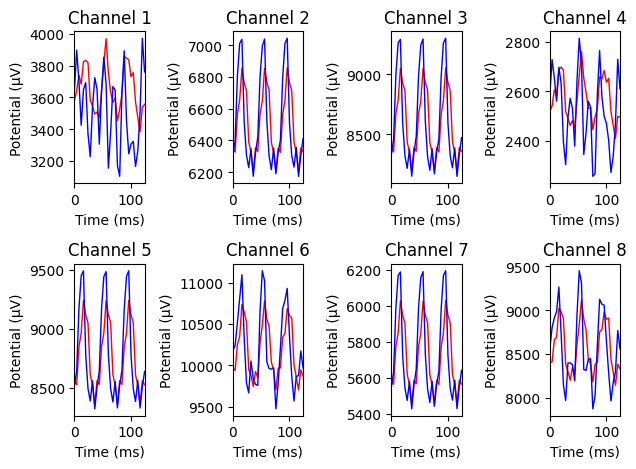







ERP for Anika_1:


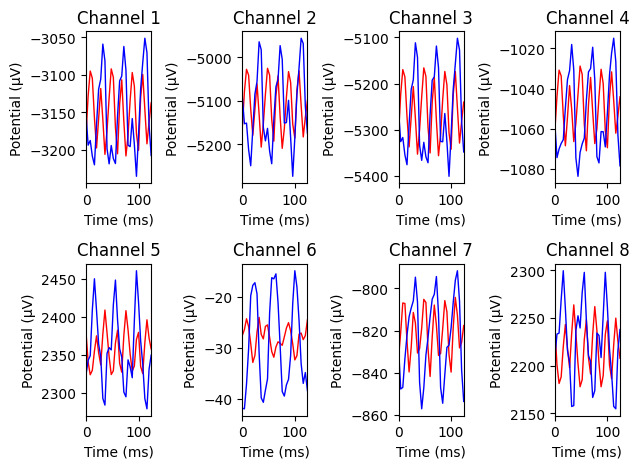







ERP for Kevin_1:


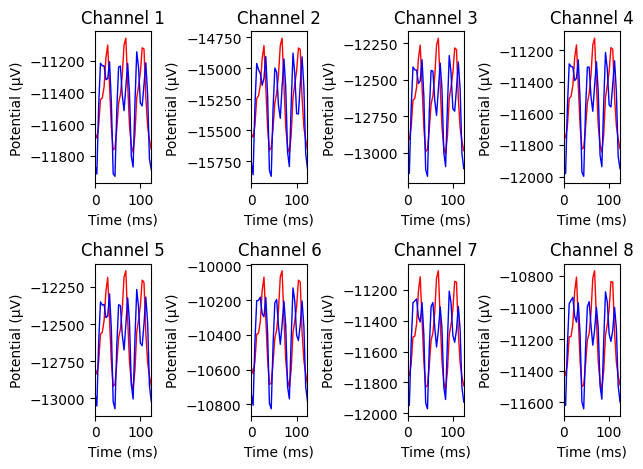







ERP for Mihika_1:


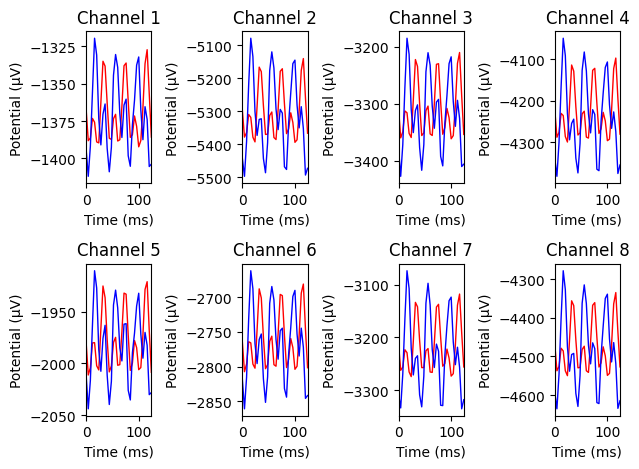







ERP for Hannah_1:


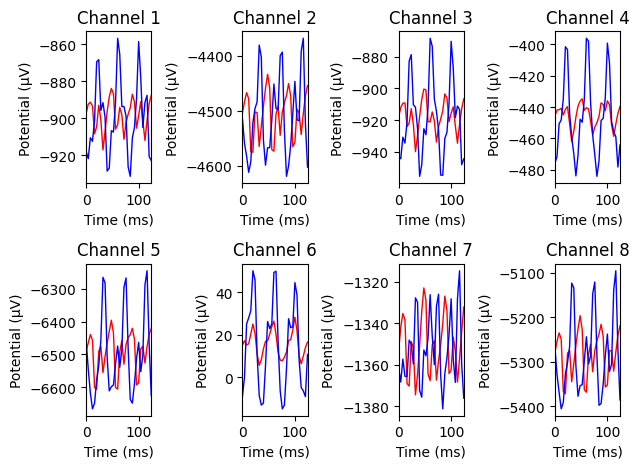

In [10]:
# Graph ERPs for all usable datasets
# Open graphs in a new tab for a larger image (higher quality screenshots)
graph_ERP(andrew_avg_33285, andrew_avg_33286, 'Andrew_1', 32, 250, 2, 4)
graph_ERP(anika_avg_33285, anika_avg_33286, 'Anika_1', 32, 250, 2, 4)
graph_ERP(kevin_avg_33285, kevin_avg_33286, 'Kevin_1', 32, 250, 2, 4)
graph_ERP(mihika_avg_33285, mihika_avg_33286, 'Mihika_1', 32, 250, 2, 4)
graph_ERP(hannah_avg_33285, hannah_avg_33286, 'Hannah_1', 32, 250, 2, 4)